<a href="https://colab.research.google.com/github/Priyankagautam08/Machine_Learning_Algorithm/blob/main/Kmean_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KMean** **Clustering** **Algorithm**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline


1. By Generating Random data

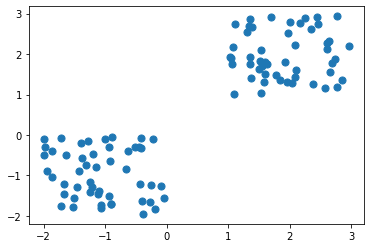

In [4]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50)
plt.show()

In [5]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
Kmean.cluster_centers_

array([[ 1.90466193,  1.97624888],
       [-1.07077258, -0.94955643]])

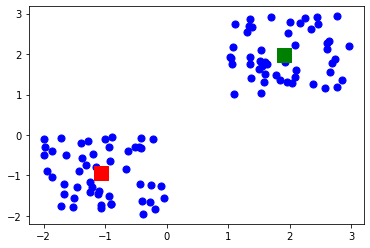

In [9]:
#plot the clusters
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(1.90466193,  1.97624888, s=200, c='g', marker='s')
plt.scatter(-1.07077258, -0.94955643, s=200, c='r', marker='s')
plt.show()

In [10]:
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [12]:
#predcition

sample_test=np.array([4.0,4.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

array([0], dtype=int32)

2. Generating 2d blobs

In [13]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.



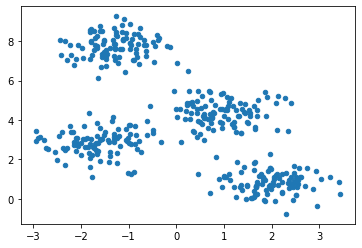

In [14]:
plt.scatter(X[:, 0], X[:, 1], s = 20);
plt.show()

In [5]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [6]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)

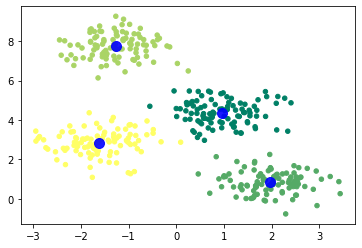

In [7]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);
plt.show()

3. K- Mean clustering using Digit datasets


In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [9]:
#initialise
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

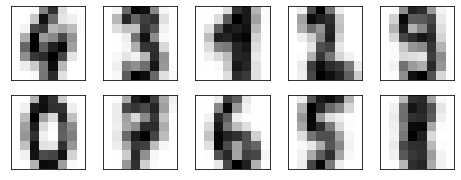

In [11]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [13]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
   mask = (clusters == i)
   labels[mask] = mode(digits.target[mask])[0]

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981